#Task1

Installing Qiskit and Pylatexenc for drawing the ciruits

In [ ]:
!pip install qiskit
!pip install pylatexenc

Import Dependencies

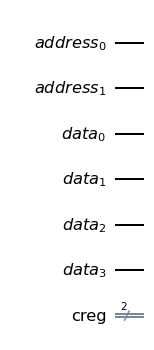

In [1]:
from qiskit import *


add_reg =QuantumRegister(2,name='address')
data_reg =QuantumRegister(4,name='data')

creg =ClassicalRegister(2,name='creg')

qc=QuantumCircuit(add_reg,data_reg,creg)
qc.draw('mpl')


Create QRAM- BucketBridge Model

Initialize the Quantum Registers

Putting address Qubits in Superposition

In [2]:
qc.x(add_reg[0])
qc.h(add_reg[1])
qc.barrier()

Adding Data to circuit, Our vector is [1, 5 , 7 ,10]

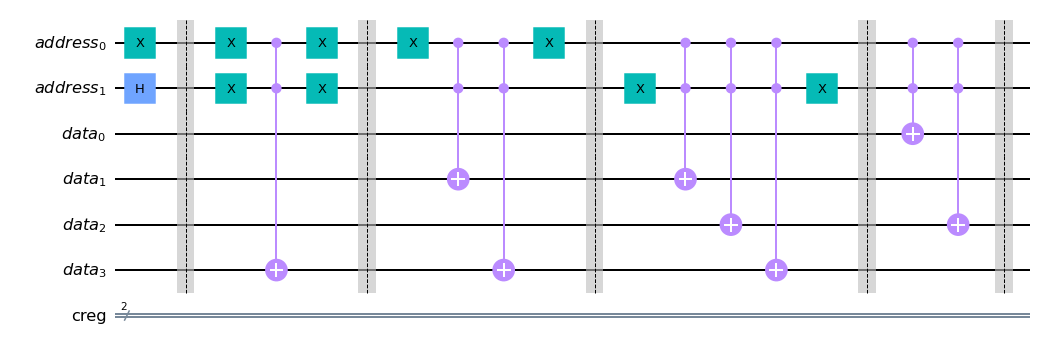

In [3]:
qc.x(add_reg)
qc.ccx(add_reg[0],add_reg[1],data_reg[3])
qc.x(add_reg)
qc.barrier()

qc.x(add_reg[0])
qc.ccx(add_reg[0],add_reg[1],data_reg[1])
qc.ccx(add_reg[0],add_reg[1],data_reg[3])
qc.x(add_reg[0])
qc.barrier()

qc.x(add_reg[1])
qc.ccx(add_reg[0],add_reg[1],data_reg[1])
qc.ccx(add_reg[0],add_reg[1],data_reg[2])
qc.ccx(add_reg[0],add_reg[1],data_reg[3])
qc.x(add_reg[1])
qc.barrier()

qc.ccx(add_reg[0],add_reg[1],data_reg[0])
qc.ccx(add_reg[0],add_reg[1],data_reg[2])
qc.barrier()
qc.draw('mpl')

Defiening Diffuser

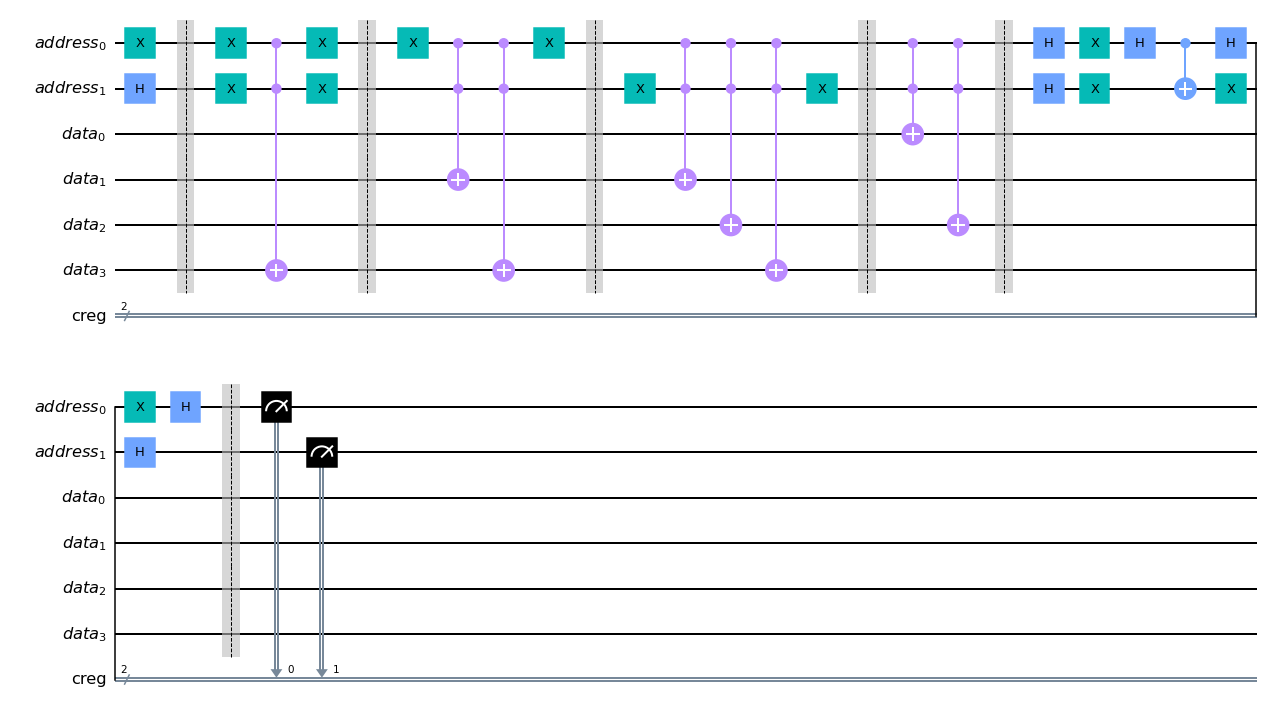

In [4]:
qc.h(add_reg)
qc.x(add_reg)
qc.h(add_reg[0])
qc.mct([0], [1])  # multi-controlled-toffoli
qc.h(add_reg[0])
qc.x(add_reg)
qc.h(add_reg)

qc.barrier()
qc.measure(add_reg,creg)

qc.draw('mpl')

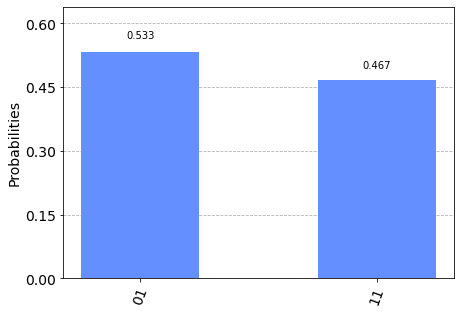

In [5]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=backend, shots=2048).result()
plot_histogram(result.get_counts())
